In [1]:
PATH_TO_GAPSE = "../";

In [2]:
include(PATH_TO_GAPSE * "src/GaPSE.jl");

In [3]:
using DelimitedFiles, Plots, Dierckx, SpecialFunctions, Printf
using TwoFAST, LaTeXStrings, ProgressMeter

In [4]:
FILE_F_MAP = PATH_TO_GAPSE * "test/datatest/F_REFERENCE.txt"
FILE_PS = PATH_TO_GAPSE * "test/datatest/file_pk.txt"
FILE_BACKGROUND = PATH_TO_GAPSE * "test/datatest/WideA_ZA_background.dat"

z_min = 0.05
z_max = 0.20
θ_max = π / 2.0
params = GaPSE.CosmoParams(z_min, z_max, θ_max;
  k_min = 1e-8, k_max = 10.0,
  Ω_b = 0.0489, Ω_cdm = 0.251020, h_0 = 0.70,
    N = 1024, fit_min = 0.05, fit_max= 0.5, con=true)

cosmo = GaPSE.Cosmology(params, FILE_BACKGROUND, FILE_PS, FILE_F_MAP)

GaPSE.parameters_used(stdout, cosmo)

# The following parameters were used for this computation: 
# CLASS Power Spectrum input file : "../test/datatest/file_pk.txt"
# F window function input file : "../test/datatest/F_REFERENCE.txt"
# CLASS Background input file: "../test/datatest/WideA_ZA_background.dat"
# 	 z_min = 0.05 	 z_max = 0.2
# 	 k_min = 1.0e-8 	 k_max = 10.0
# 	 h_0 = 0.7 	 Ω_b = 0.0489 	 Ω_cdm = 0.25102 	 Ω_M0 = 0.29992
# 	 comoving s_min = 148.1920001465757 Mpc/h_0
# 	 comoving s_max = 571.7022420258767 Mpc/h_0
# 	 comoving s_eff = 435.3747095690664 Mpc/h_0
# 	 comoving z_eff = 0.15045636096023224 
# 	 Volume of the survey V_survey = 3.845366167995967e8
# 	 σ_0 = 15.593462966741178
# 	 σ_1 = 15.074895881392285
# 	 σ_2 = 100.85852368830226
# 	 σ_3 = 3735.1226181519773
# 


In [5]:
effect = "auto_doppler";
L = 0; 

In [6]:
GaPSE.print_map_ξ_multipole(cosmo, "PSM_files/xi_"*effect*"_L$L"*".txt", 
    effect; use_windows = false, N_log=1000, N_μs = 30, pr=true, L=L)

auto_doppler, L=0: 100%|████████████████████████████████| Time: 0:00:01



time needed for map_integral_on_mu for auto_doppler [in s] = 1.62870 


In [7]:
GaPSE.print_PS_multipole("PSM_files/xi_"*effect*"_L$L"*".txt",
    "PSM_files/ps_"*effect*"_L$L"*".txt";
     L = L, N = 100, pr = true, int_s_min=1e-1, int_s_max=1e3)


I'm computiong the PS_multipole from the file PSM_files/xi_auto_doppler_L0.txt

time needed for Power Spectrum  computation [in s] = 0.20828986167907715


time needed for Power Spectrum  computation [in s] = 0.2164778709411621



In [8]:
my_table = readdlm("PSM_files/ps_"*effect*"_L$L"*".txt", comments=true);
my_ks = convert(Vector{Float64}, my_table[:,1]);
my_pks = convert(Vector{Float64}, my_table[:,2]);

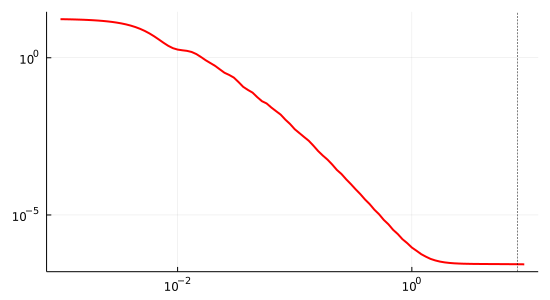

In [9]:
my_xs = my_ks
my_ys = my_pks

S_VLIM = 8
S_VLIM_F = @sprintf("%.2f", S_VLIM)

P = plot(
    my_xs[my_ys .> 0], my_ys[my_ys .> 0], 
    xaxis=:log, 
    yaxis=:log, 
    lw=2, lc=:red, ls=:solid, 
    size=(550, 300),
    #label="My PS", 
    #legend=:bottomleft,
    legend=false,
)

vline!(P, [S_VLIM], label="$S_VLIM_F Mpc/h_0", lc=:black, 
    lw=0.5, ls=:dash)

#savefig(P, "PS_AutoDoppler_L0.pdf")
#display(P)